Non-squared systems of linear equations
===

In the following we consider the problem of solving a system of linear equations of the form

$$
\mathbf{A}\mathbf{x} = \mathbf{b},
$$

for $\mathbf{A}\in\mathcal{M}_{m,n}(\mathbb{R}),$ $\mathbf{x}\in\mathbb{R}^n,$ and
$\mathbf{b}\in\mathbb{R}^m,$ with $m\neq n.$

In [1]:
import scipy.linalg as lin
import scipy
import numpy as np
import matplotlib.pylab as plt

**Example 1** 

Fit a model to a set of points (measurements) $\{(x_i,y_i)\}$.
Assume the model to be $y = c_1 + c_2 x + c_3 x^2.$

In [2]:
# Generate some data (without and with noise in y)
x = np.linspace(-2.0, 2.0, 100)
y = 3 - x + 2 * x**2 
yn = y + 2 * (np.random.rand(1, 100) - 0.5)  # add some noise in the outcome

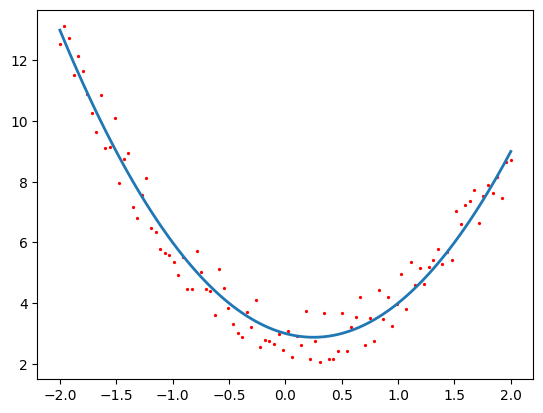

In [3]:
plt.plot(x, y, linewidth=2)
plt.scatter(x, yn, c='red', s=1.75, marker='o')

In [4]:
# Build the system: Vandermonde matrix
A = np.stack((np.ones((100,)), x, x**2)).transpose()

c = lin.pinv(A) @ y.transpose()
cn = lin.pinv(A) @ yn.transpose()

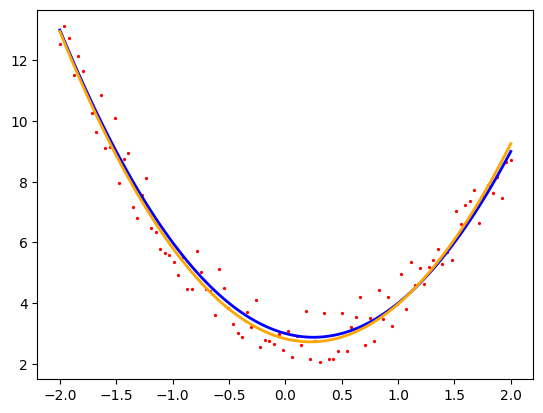

In [5]:
plt.plot(x, c[0] + c[1]*x + c[2]*x**2, linewidth=2, color='blue')
plt.plot(x, cn[0] + cn[1]*x + cn[2]*x**2, linewidth=2, color='orange')
plt.scatter(x, yn, c='red', s=1.75, marker='o')

**Example 2**

__QR__ decomposition

In [6]:
A = np.array([[3,-6],[4, -8],[0, 1]])
b = np.array([-1, 7, 2])

In [7]:
Q1, R = lin.qr(A, mode="economic", pivoting=False)  # reduced factorization

In [8]:
d = Q1.transpose() @ b
lin.solve_triangular(R, d)  # why?

array([5., 2.])

Alternatively, we can use __lstsq()__ function to obtain the least squares approximated solution:

In [9]:
lin.lstsq(A, b)

(array([5., 2.]), 25.0, 2, array([11.2161167 ,  0.44578709]))

**Example 3**

Matrix approximation via _SVD_ decomposition:

$$
\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T
= \sum_{i=1}^n \sigma_i \mathbf{u}_i \mathbf{v}_i^T
\approx \sum_{i=1}^{k<n} \sigma_i \mathbf{u}_i \mathbf{v}_i^T
$$

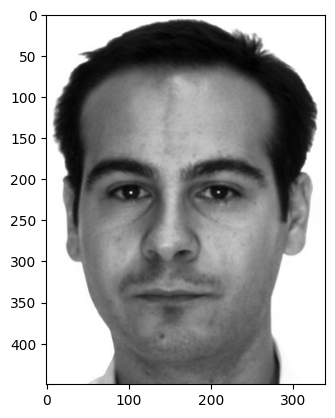

In [10]:
from PIL import Image  # or something else to read images

img = Image.open("./face01.png")
A = np.array(img).astype(np.float64)
A /= 255.0       # get values to 0...1
plt.imshow(A, cmap='gray')  # to interpret the values in A as pixel intensity (grey scale)

In [11]:
U, S, V = lin.svd(A, full_matrices=False, lapack_driver='gesvd')

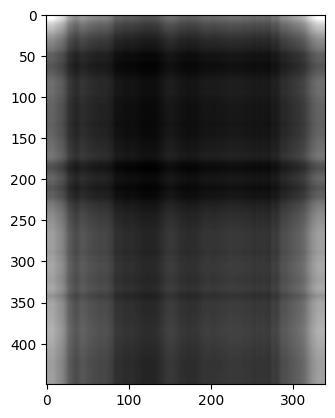

In [12]:
k = 1
P = U[:,0:k] @ np.diag(S[0:k]) @ V[0:k,:]

plt.imshow(P, cmap='gray', vmin=P.min(), vmax=P.max())

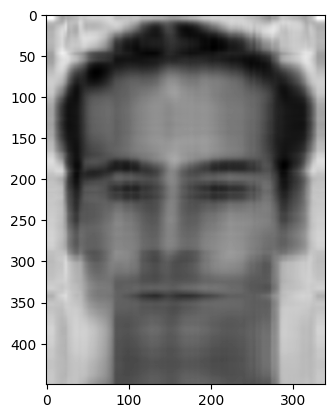

In [13]:
k = 5
P = U[:,0:k] @ np.diag(S[0:k]) @ V[0:k,:]

plt.imshow(P, cmap='gray', vmin=P.min(), vmax=P.max())

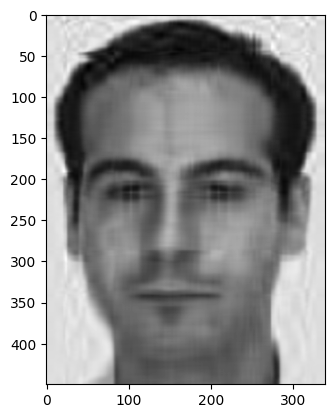

In [14]:
k = 15
P = U[:,0:k] @ np.diag(S[0:k]) @ V[0:k,:]

plt.imshow(P, cmap='gray', vmin=P.min(), vmax=P.max())

Eigenvectors and eigenvalues
===

For an eigenvalue problem,
$$
\mathbf{A}\mathbf{x} = \lambda \mathbf{x}, \quad\mathbf{x}\in\mathbb{R}^n, \mathbf{x}\neq 0
$$
the _characteristic polynomial_ is
$$
\operatorname{det}(\mathbf{A}-\lambda \mathbf{I}) = 0.
$$

**Example 4:**

In [15]:
A = np.array([[0, 1],[0, -1]])

In [16]:
L, V = lin.eig(A, right=True)

In [17]:
L

array([ 0.+0.j, -1.+0.j])

In [18]:
V

array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]])

To obtain only the eigevalues:

In [19]:
lin.eigvals(A)

array([ 0.+0.j, -1.+0.j])